# Data preprocessing

In [29]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
df=pd.read_csv("Google_Stock_Price_Train.csv")
train=df.iloc[:,1:2].values
sc=MinMaxScaler(feature_range=(0,1))
train_scaled=sc.fit_transform(train)
X_train=[]
y_train=[]
for i in range(60,1258):
    X_train.append(train_scaled[i-60:i,0])
    y_train.append(train_scaled[i,0])
X_train,y_train=np.array(X_train),np.array(y_train)
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

# Building RNN

In [48]:
from keras.models import Sequential
from keras.layers import Dropout,LSTM,Dense
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer="adam",loss="mean_squared_error")
model.fit(X_train,y_train,epochs=50)

Epoch 1/50
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0416
Epoch 2/50
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0068
Epoch 3/50
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0054
Epoch 4/50
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0054
Epoch 5/50
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0050
Epoch 6/50
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0047
Epoch 7/50
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0048
Epoch 8/50
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0046
Epoch 9/50
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0051
Epoch 10/50
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0042
Epoch 11/50
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0046
Epoch 12/50
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0043
E

# Prediction using Test data

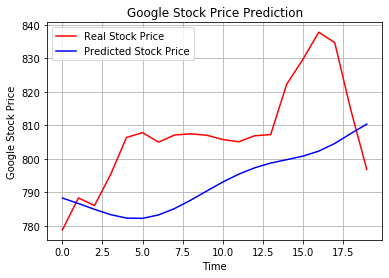

In [130]:
import matplotlib.pyplot as plt
df2=pd.read_csv("Google_Stock_Price_Test.csv")
real_stock=df2.iloc[:,1:2].values
dataset_total=pd.concat((df["Open"],df2["Open"]),axis=0)
inputs=dataset_total[len(dataset_total)-len(df2)-60:].values
inputs=inputs.reshape(-1,1)
inputs=sc.transform(inputs)
X_test=[]
for i in range (60,80):
    X_test.append(inputs[i-60:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_stock=sc.inverse_transform(model.predict(X_test))
plt.plot(real_stock,color="red",label="Real Stock Price")
plt.plot(predicted_stock,color="blue",label="Predicted Stock Price")
plt.xlabel("Time")
plt.ylabel("Google Stock Price")
plt.title("Google Stock Price Prediction")
plt.legend(loc="best")
plt.grid()
plt.show()